# Grid Stability Classification Using Conventional Machine Learning Algorithms

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Reading the dataset

In [4]:
df = pd.read_csv("data.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


#### Preprocessing step: Label Encoding the target variable (stabf)

In [5]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'stabf'. 
df['stabf'] = label_encoder.fit_transform(df['stabf'])

In [6]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1


In [7]:
print("Encoded classes:\n")
print("0 : ", label_encoder.inverse_transform([0]))
print("1 : ", label_encoder.inverse_transform([1]))

Encoded classes:

0 :  ['stable']
1 :  ['unstable']


#### Splitting into features(X) and target variables(y)

In [8]:
X = df.drop('stabf', axis = 1)
y = df['stabf']

In [9]:
#X
#y

#### Splitting the dataset into training and testing set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print("Training set size: ", len(X_train))
print("Test set size: ", len(X_test))

Training set size:  8000
Test set size:  2000


#### Utility function to plot the confusion matrix

In [11]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy = {:0.2f}%; misclass = {:0.2f}%'.format(accuracy*100, misclass*100))
    plt.show()

## Creating and training the models

We will explore a few conventional machine learning algorithms for this classification problem. The following techniques will be used here:

1. Support Vector Machine (SVM)
2. Decision Tree classifier
3. Logistic Regression
4. Gaussian Naive Bayes classifier
5. Random Forest classifier
6. k-Nearest Neighbours (KNN) classifier

In [12]:
#Import scikit-learn metrics module for accuracy calculation and confusion matrix creation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

### 1. SVM

In [13]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9455


##### Confusion Matrix for SVM 

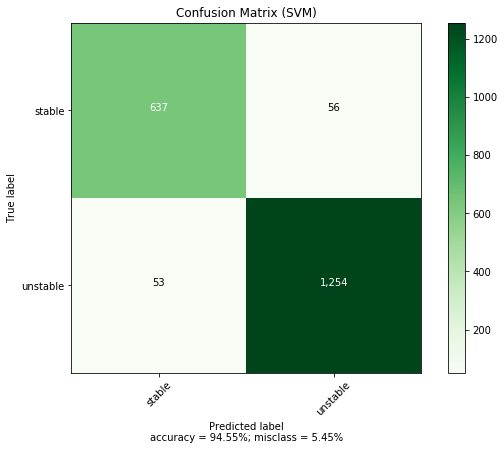

In [14]:
array = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = array, normalize = False, target_names = ['stable', 'unstable'], title= "Confusion Matrix (SVM)")

### 2. Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Evaluating Model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9995


##### Confusion Matrix for the decision tree classifier

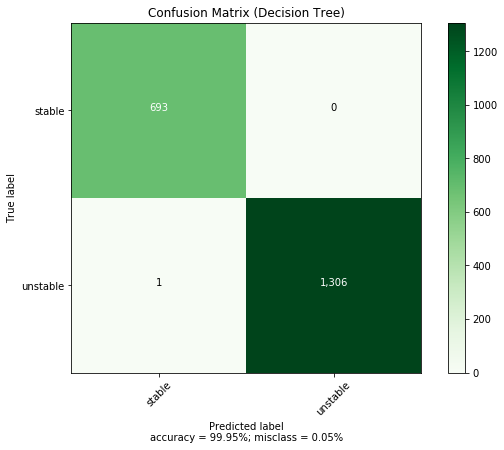

In [37]:
array = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = array, normalize = False, target_names = ['stable', 'unstable'], title= "Confusion Matrix (Decision Tree)")

### 3. Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

#Creating Logistic Regression object
logreg = LogisticRegression()

#Training
logreg.fit(X_train, y_train)

#Predicting for the test set
y_pred = logreg.predict(X_test)

#Evaluating model
print('Accuracy: ', logreg.score(X_test, y_test))

Accuracy:  0.904


C:\Users\ckris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### Confusion Matrix for logistic regression classifier

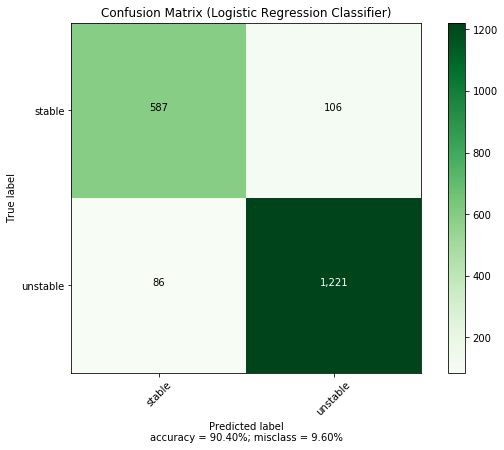

In [18]:
array = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = array, normalize = False, target_names = ['stable', 'unstable'], title= "Confusion Matrix (Logistic Regression Classifier)")

### 4. Gaussian Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

#Evaluating model
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9735


##### Confusion Matrix for naive Bayes classifier

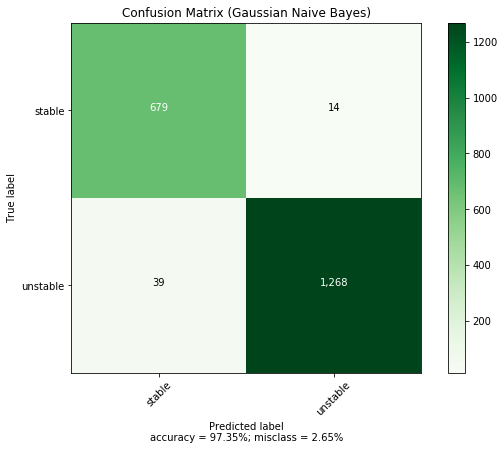

In [31]:
array = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = array, normalize = False, target_names = ['stable', 'unstable'], title= "Confusion Matrix (Gaussian Naive Bayes)")

### 5. Random Forest Classifier

In [32]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest classifier 
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training set
clf.fit(X_train, y_train)

#Making predictions on the test set
y_pred = clf.predict(X_test)

#Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9995


##### Confusion matrix for the Random Forest Classifier

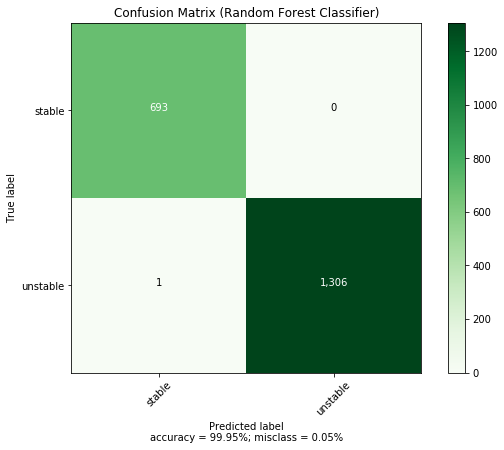

In [33]:
array = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = array, normalize = False, target_names = ['stable', 'unstable'], title= "Confusion Matrix (Random Forest Classifier)")

### 6. k-Nearest Neighbours Classifier

In [34]:
#Importing KNN module
from sklearn.neighbors import KNeighborsClassifier

#Creating classifier object with k = 3
clf = KNeighborsClassifier(n_neighbors = 10)

# Train the model using the training set
clf.fit(X_train, y_train)

#Predicting for the test set
y_pred = clf.predict(X_test) 

#Evaluating performance of the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.786


##### Confusion matrix for the kNN classifier

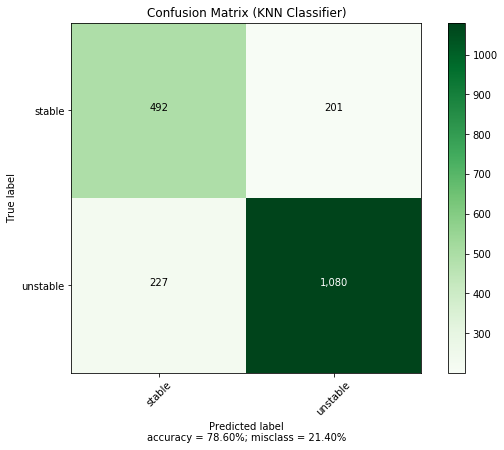

In [35]:
array = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = array, normalize = False, target_names = ['stable', 'unstable'], title= "Confusion Matrix (KNN Classifier)")